# **TikTok Project**
**Course 6 - The Nuts and Bolts of Machine Learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


==> ENTER YOUR RESPONSES HERE

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [19]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for data preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance


# Import packages for saving models
import pickle


Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# Load dataset into dataframe
data = pd.read_csv("/Users/aaronkeeney/Documents/Data Analytics Projects/Tiktok/tiktok_dataset _ML.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [5]:
# Display first few rows
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [6]:
# Get number of rows and columns
data.shape


(19382, 12)

Get the data types of the columns.

In [7]:
# Get data types of columns
data.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [8]:
# Get basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [9]:
# Generate basic descriptive stats
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [10]:
# Check for missing values
data.isna().sum()


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [11]:
# Drop rows with missing values
data = data.dropna(axis = 0).reset_index(drop = True)
data.isna().sum()


#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [12]:
# Display first few rows after handling missing values
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [13]:
# Check for duplicates
data.duplicated().sum()


0

Check for and handle outliers.

In [14]:
# Outliers are not really relevant here, since our target variable is a binary classifier
data['claim_status'].unique()

# This shows that we do not have any typos in our target variable.


array(['claim', 'opinion'], dtype=object)

Check class balance.

In [15]:
# Check class balance
print(data[['claim_status']].value_counts(normalize = True)*100)

# Our class balance is almost exactly a 50-50 split. This is essentially ideal for the task at hand.

claim_status
claim           50.345839
opinion         49.654161
Name: proportion, dtype: float64


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [16]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe

data['text_length_chars'] = data['video_transcription_text'].apply(len)
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length_chars
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Calculate the average text_length for claims and opinions.

In [17]:
# Calculate the average text_length for claims and opinions
data.groupby('claim_status')['text_length_chars'].mean()


claim_status
claim      95.376978
opinion    82.722562
Name: text_length_chars, dtype: float64

Visualize the distribution of `text_length` for claims and opinions.

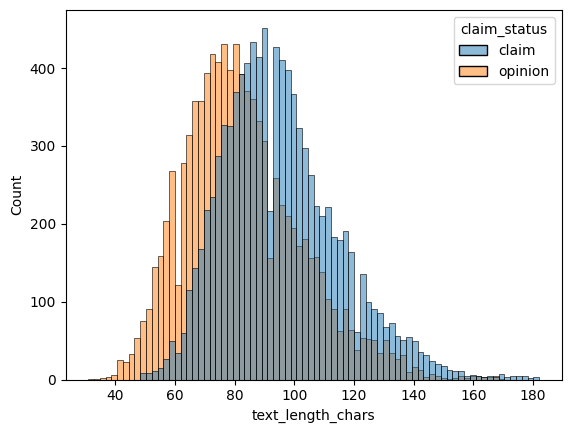

In [18]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

sns.histplot(data = data, x = 'text_length_chars', stat = 'count', 
             hue = 'claim_status')
#sns.histplot(data = data[data['claim_status'] == 'opinion'], x = 'text_length_chars', stat = 'count',
             #hue = 'claim_status')

plt.show()

**Feature selection and transformation**

Encode target and catgorical variables. In version one of this project, transcription text was dropped below, and the model was still very powerful. However, in the final iteration which follows, Natural Language Processing (NLP) methods will be used to create a model that is even more robust.

In [21]:
# Create a copy of the X data
X = data.drop(columns = 'claim_status')

# Drop unnecessary columns
X = X.drop(columns = ['#', 'video_id'])


# Encode target variable
y = data['claim_status'].map({'claim' : 1, 'opinion' : 0})

# Dummy encode remaining categorical values
X = pd.get_dummies(X, drop_first = True, columns =['verified_status', 'author_ban_status'], dtype = int)
X.head()


,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length_chars,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


### **Task 4: Split the data**

Assign target variable.

In [22]:
# Isolate target variable

'''This was already performed in the steps above.'''
y.head()

0    1
1    1
2    1
3    1
4    1
Name: claim_status, dtype: int64

Isolate the features.

In [23]:
# Isolate features
'''This was already performed in the steps above.'''

# Display first few rows of features dataframe
X.head()


,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length_chars,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state = 42)


Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [25]:
# Split the training data into training and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = .25, stratify = y_train, random_state = 42)


Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [35]:
# Get shape of each training, validation, and testing set
print(X_test.shape)
print(y_test.shape)
print(X_tr.shape)
print(y_tr.shape)
print(X_val.shape)
print(y_val.shape)


(3817, 11)
(3817,)
(11450, 11)
(11450,)
(3817, 11)
(3817,)


#### **Task 5.1: Incorporate NLP methods**

Next, we implement a count vectorizer object. This turns the string text from the 'transition text' column into a matrix of token counts, essentially turning 'transcription text' into many dummy variables.

In [28]:
count_vec = CountVectorizer(ngram_range = (2,3),
                            max_features = 15,
                            stop_words = 'english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [36]:
# Apply the count vectorizer to 'video_transcription_text' to extract numerical features

count_data = count_vec.fit_transform(X_tr['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
count_df = pd.DataFrame(data = count_data, columns = count_vec.get_feature_names_out())
count_df.head()

,colleague learned,colleague read,discussion board,friend learned,friend read,internet forum,learned media,learned news,learned website,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# Join this transformed data with the original X_tr dataset.

X_tr_final = pd.concat([X_tr.drop(columns = ['video_transcription_text']).reset_index(drop = True), count_df], axis = 1)
X_tr_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length_chars,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,internet forum,learned media,learned news,learned website,media claim,news claim,point view,read media,social media,willing wager
0,41,749.0,258.0,26.0,1.0,0.0,80,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,54,509786.0,71132.0,730.0,72.0,9.0,106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,57,9514.0,1137.0,205.0,14.0,1.0,60,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,6656.0,1181.0,158.0,18.0,3.0,84,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,90131.0,44618.0,13132.0,439.0,121.0,108,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, the same method is applied to the validation and testing data sets. Naturally, it is crucial to use the same count vectorizer for each of these sets, so that they can be modeled consistently.

In [41]:
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']).reset_index(drop=True), test_count_df], axis=1)


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [106]:
%%time

# Instantiate the random forest classifier
rfc = RandomForestClassifier(random_state = 42)

# Create a dictionary of hyperparameters to tune
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'f1', 'recall']

# Instantiate the GridSearchCV object
rf_val = GridSearchCV(rfc, cv_params, cv = 5, scoring = scoring, refit = 'f1', n_jobs = -1, verbose = 1)

#Fit the model
rf_val.fit(X_tr_final, y_tr)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


CPU times: user 943 ms, sys: 103 ms, total: 1.05 s
Wall time: 15.2 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', scoring=['accuracy', 'precision', 'f1', 'recall'],
             verbose=1)

In [107]:
# Examine best recall score
rf_val.best_score_

0.997213749487015

In [108]:
  # Get all the results from the CV and put them in a df
rfc_results = pd.DataFrame(rf_val.cv_results_)

  # Isolate the row of the df with the max(mean precision score)
max_rfc_precision = max(rfc_results['mean_test_precision'])
best_rfc_model_precision = rfc_results[rfc_results['mean_test_precision'] == max_rfc_precision]
best_rfc_model_precision[['mean_test_precision', 'mean_test_recall']]


,mean_test_precision,mean_test_recall
14,1.0,0.994448


In [109]:
# Examine best parameters
rf_val.best_params_


{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.01,
 'n_estimators': 50}

**Question:** How well is your model performing? Consider average recall score and precision score.

These scores are extremely high. This model only misses about 1 in 1000 claims, and about 99% of the videos it flags as claims are actually claims.

### **Build an XGBoost model**

In [86]:
%%time

# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 42) 

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }    

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5, refit = 'f1')

xgb_cv.fit(X_tr_final, y_tr)


CPU times: user 30min 45s, sys: 1min 45s, total: 32min 30s
Wall time: 5min 25s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [87]:
  # Get all the results from the CV and put them in a df
xgb_results = pd.DataFrame(xgb_cv.cv_results_)

  # Isolate the row of the df with the max(mean precision score)
max_xgb_precision = max(xgb_results['mean_test_precision'])
best_xgb_model_precision = xgb_results[xgb_results['mean_test_precision'] == max_xgb_precision]
best_xgb_model_precision[['mean_test_precision', 'mean_test_recall']]

,mean_test_precision,mean_test_recall
18,0.999825,0.988376


**Question:** How well does your model perform? Consider recall score and precision score.

This is about as good as the random forest model from before. The precision is ever so slightly higher, and the recall a hair lower. We will look at the validation set before we make any decisions about the champion model.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [110]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_pred_rfc = rf_val.predict(X_val_final)

Display the predictions on the encoded testing set.

In [111]:
# Display the predictions on the encoded testing set
y_pred_rfc

array([1, 1, 1, ..., 1, 1, 1])

Display the true labels of the testing set.

In [112]:
y_val


7425     1
9498     1
3101     1
10115    0
11807    0
        ..
10260    0
6178     1
5216     1
651      1
5668     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

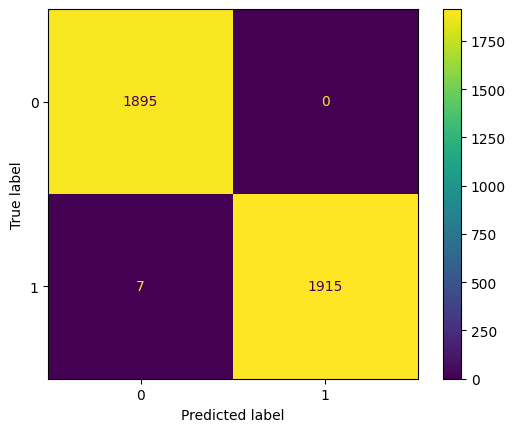

In [113]:
# Create a confusion matrix to visualize the results of the classification model
# I will use a helper function, since I need to to this for multiple models

def plot_confusion_matrix(model, x_data, y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
  
    disp.plot()
    plt.show()

plot_confusion_matrix(rf_val, X_val_final, y_val)


Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [114]:
# Create a classification report
# Create classification report for random forest model

def classification_report(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
  
    return table

classification_report('Random Forest', rf_val)

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.997214,0.994448,1.0,0.997205


**Question:** What does your classification report show? What does the confusion matrix indicate?

The confusion matrix indicates that the model is very strong. There were no false positives, and only 7 false negatives for from several thousand data points. However, in these instances false negatives are worse than false positives, so we may want to tweak this model and evaluate differently.

#### **XGBoost**

In [115]:
#Evaluate XGBoost model
y_pred_xgb = xgb_cv.predict(X_val_final)


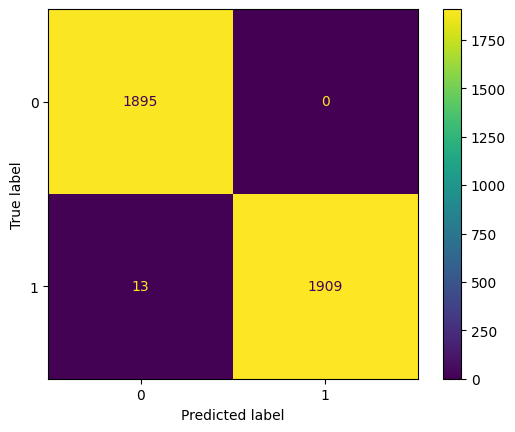

In [116]:
# See above for code.

plot_confusion_matrix(xgb_cv, X_val_final, y_val)

In [117]:
# Create a classification report
classification_report('Random Forest', xgb_cv)


,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.995555,0.991499,0.999649,0.995546


**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

With the updated approach that includes NLP methods, the random forest classifier performs measuarbly better. It has the added benefit of being FAR faster to calculate, so we could do more complete hyperparameter tuning if a more powerful model is deemed necessary. We could also add more n-grams to the count vectorizer, since we seem to have easily enough computational resources.

After trying many different refit parameters and receiving idential results, the random forest classifier remains the best perform. Thus, it will be selected as out champion model, and the final tests below will utilize it.

### **Use champion model to predict on test data**

In [120]:
y_pred_champ = rf_val.predict(X_test_final)


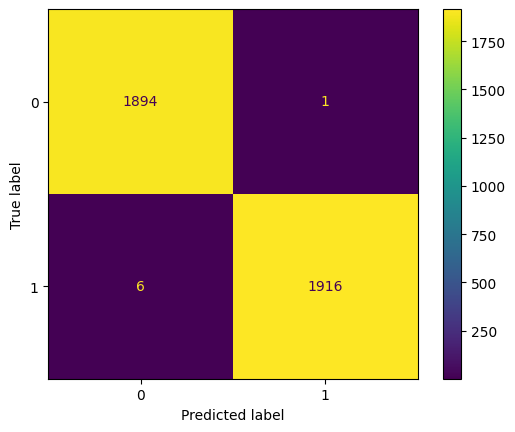

In [122]:
# Compute values for confusion matrix

# Create display of confusion matrix

# Plot confusion matrix

# Display plot

plot_confusion_matrix(rf_val, X_test_final, y_test)

In [123]:
# Classification report for champion model

classification_report('Champion', rf_val)

,Model,F1,Recall,Precision,Accuracy
0,Champion,0.997214,0.994448,1.0,0.997205


#### **Feature importances of champion model**


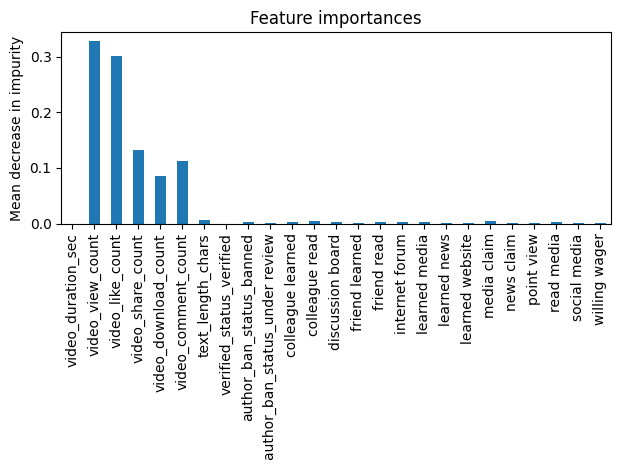

In [125]:
importances = rf_val.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()


**Question:** Describe your most predictive features. Were your results surprising?

View count and like count are by far the most important predictive feature. This is not terribly surprising. Shares, comments, and downloads follow immediately after. Interestingly, the relative importance of the various n-grams is low, but not zero. Even text length is more important. However, these data are easily manageable by the compuational power of my laptop, so including them to prevent false negatives is crucially important. Verified status has almost no predictive power, which is surprising to me. Perhaps people do not change their speaking habits once they are verified. In other words, they may not use their verified status as a platform to proclaim their opionions as truth.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


1. I would recommend using this model. It has a very strong success rate, and it will greatly assist prioritization of the moderation team's efforts. With that in mind, I would like to spend more time with the data team examining the data points that the model was unable to flag to see if we can determine a pattern. This may be useful information for examining model biases or potential pitfalls.

2. This random forest classifier creates an ensemble of trees to make individual decsions and averages the results to make a final decision. Each tree has different information, meaning that it will make different errors. These errors will average out, leaving a prediction that is far less error-prone.

3. I would be interested to expand on the NLP approach to see if more information could be gleaned. Additionally, since there are so few false negatives, it would be interesting to read those texts as a human to see if there is a patter that our model is missing. We may be able to transform the data in some way to flag more videos.

We could likely go back and find even more optimized hyperparameters, but the increase in performance will be marginal.

4. Additional features may be helpful, but as stated above, reading the text of the misclassified videos would be the best way to determine what those are.

In [126]:
# Pickle the champion model
# Define a path to the folder where you want to save the model
path = '/Users/aaronkeeney/Documents/Data Analytics Projects/Tiktok/'

with open(path+'tiktok_classifier_champion_model', 'wb') as to_write:
    pickle.dump(rf_val, to_write)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.